# IE6400 Foundations of Data Analytics Engineering
# Fall 2024
### Module 4: Time Series Analysis Part - 1
### -- STUDENT VERSION --
Meghana Sreenivasa Rao
NUID: 002331855

### Time Series Analysis


#### Exercise 1 Understanding Trend

#### Before starting the exercise, explain the definition of the Trend in your own words:
- Trend in time series analysis is the overall direction in which the data moves over a long period. It shows whether values are generally increasing, decreasing, or remaining stable, excluding any short-term variations.
- Identifying a trend helps in understanding the underlying patterns in data and is useful for making long-term predictions. The trend can be linear (steady rise or fall) or nonlinear (changing at varying rates).


#### Problem Statement

Given a generated time series dataset, your task is to visualize and identify the trend in the data. By the end of this exercise, you should be able to understand how to detect and interpret trends in time series data.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generating a time series dataset
np.random.seed(42)
time = pd.date_range(start='1/1/2020', end='1/1/2023', freq='ME')  # Use 'ME' instead of 'M' for month-end frequency

# --- Added the code here ---
trend = np.linspace(start=50, stop=100, num=len(time))
noise = np.random.normal(loc=0, scale=5, size=len(time))
data = trend + noise
# ---------------------------

df = pd.DataFrame(data, columns=['Value'], index=time)

# Displaying the first few rows of the dataset
print(df.head())


                Value
2020-01-31  52.483571
2020-02-29  50.737250
2020-03-31  56.095586
2020-04-30  61.900864
2020-05-31  54.543519


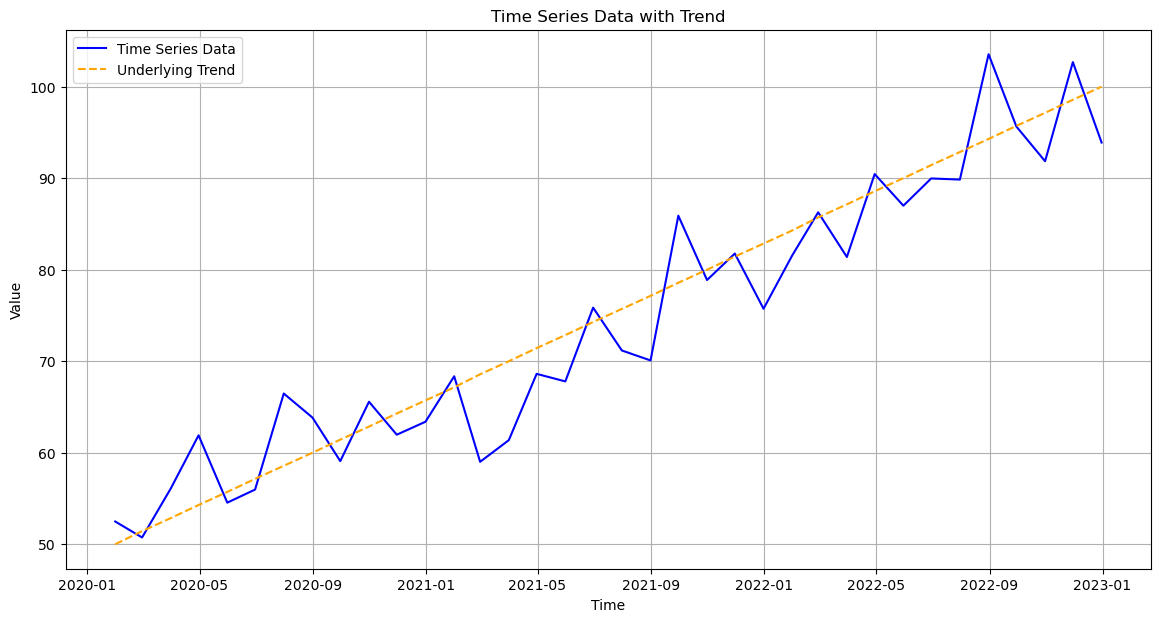

In [7]:
# Visualizing the time series data
plt.figure(figsize=(14,7))

# --- Added the code here ---
plt.plot(np.array(df.index), np.array(df['Value']), label='Time Series Data', color='blue')
plt.plot(np.array(df.index), np.array(trend), label='Underlying Trend', color='orange', linestyle='--')
# ---------------------------

plt.title('Time Series Data with Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#### Write down the explanations and interpretations:
- The plot visually represents the time series data, where the blue line shows the actual data with both trend and noise, while the orange dashed line depicts the underlying trend without noise. This clearly highlights how the data fluctuates around the trend over time.
- The time series data, starting from January 2020 to January 2023, exhibits an upward movement, with periodic deviations due to the added noise, and the trend line shows a smooth increase, showing the long-term progression of the values.


#### Exercise 2 Detrending

#### Before starting the exercise, explain the definition of the Detrending in your own words:
- Detrending is the process of removing the long-term trend from a time series to focus on short-term fluctuations or seasonal variations. It helps isolate the underlying patterns from the overall direction of the data.
- This is typically done by subtracting the trend component (either linear or nonlinear) from the original data, making it easier to analyze the other factors driving the data, like cycles or irregularities.


#### Problem Statement

Given the "AirPassengers" dataset, your task is to apply detrending techniques to remove the trend from the data. By the end of this exercise, you should be able to understand how to detrend time series data and the importance of doing so.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore') 

df = sm.datasets.get_rdataset('AirPassengers').data
df.head()


,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


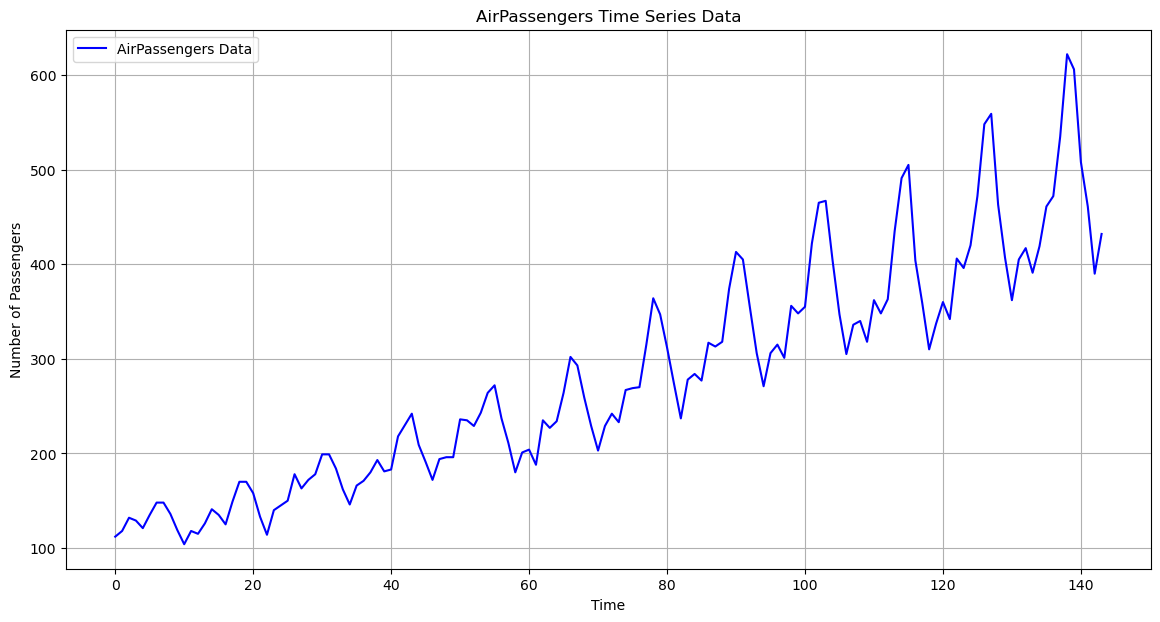

In [11]:
# Visualizing the time series data

plt.figure(figsize=(14,7))
plt.plot(list(df.index), df['value'].values, label='AirPassengers Data', color='blue')
plt.title('AirPassengers Time Series Data')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


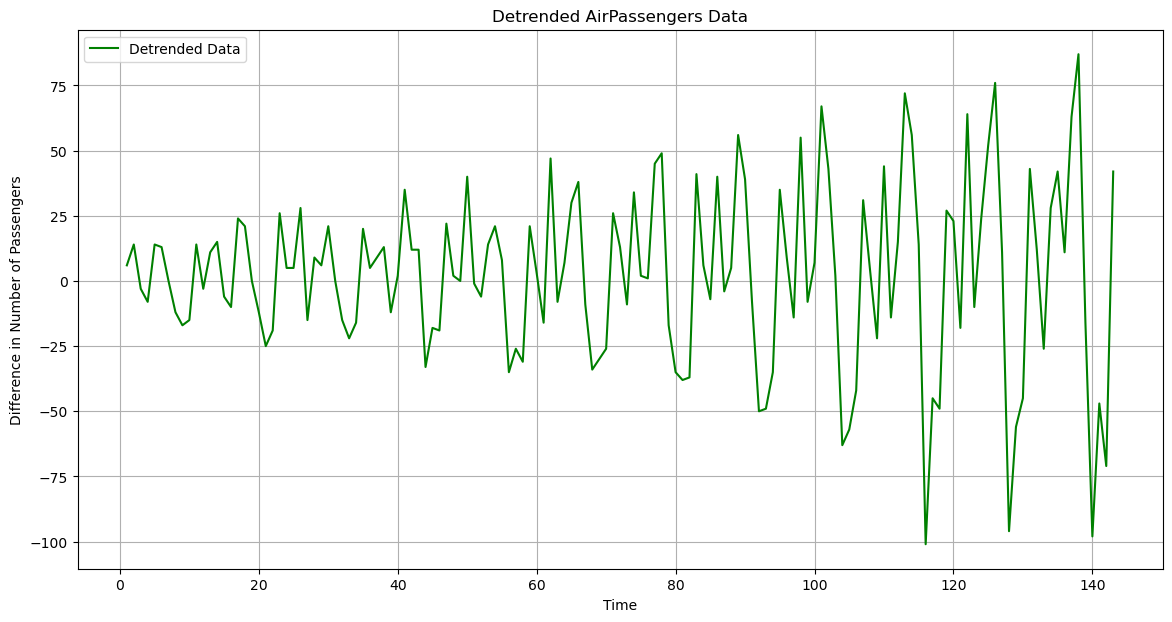

In [13]:
# --- Added the code here ---
df['Detrended']=df['value'].diff()
# ---------------------------

# Visualizing the detrended data
plt.figure(figsize=(14,7))
plt.plot(list(df.index), df['Detrended'].values, label='Detrended Data', color='green')
plt.title('Detrended AirPassengers Data')
plt.xlabel('Time')
plt.ylabel('Difference in Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


#### Write down the explanations and interpretations:
- Original Time Series (AirPassengers Data):
  - Shows a general upward trend in the number of passengers, indicating growth over time.
  - Fluctuations are visible, suggesting seasonal variations or cyclical patterns in passenger counts.
  - The data exhibits long-term growth, with peaks and troughs reflecting recurring cycles.
- Detrended Data:
  - The overall trend is removed, leaving only the differences between consecutive data points.
  - Reveals short-term fluctuations and seasonal effects, without the influence of long-term growth.
  - Highlights cyclical or irregular patterns that were previously masked by the trend.


#### Exercise 3 Time Series Analysis: Seasonality

#### Before starting the exercise, explain the definition of the Seasonality in your own words:
- Seasonality in time series refers to patterns that repeat at regular intervals, typically within a year or another defined period. These patterns are caused by external factors that influence data at specific times, such as weather, holidays, or business cycles.
- Identifying seasonality helps in predicting future values by recognizing when similar patterns are likely to occur, allowing for better planning and resource allocation.


#### Problem Statement

Given the "AirPassengers" dataset, your task is to identify and visualize the seasonality present in the data. By the end of this exercise, you should be able to understand how to detect seasonality in time series data and its significance.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = sm.datasets.get_rdataset('AirPassengers').data
df.index = pd.date_range(start='1949-01-01', end='1961-01-01', freq='M')
df.head()


,time,value
1949-01-31,1949.000000,112
1949-02-28,1949.083333,118
1949-03-31,1949.166667,132
1949-04-30,1949.250000,129
1949-05-31,1949.333333,121


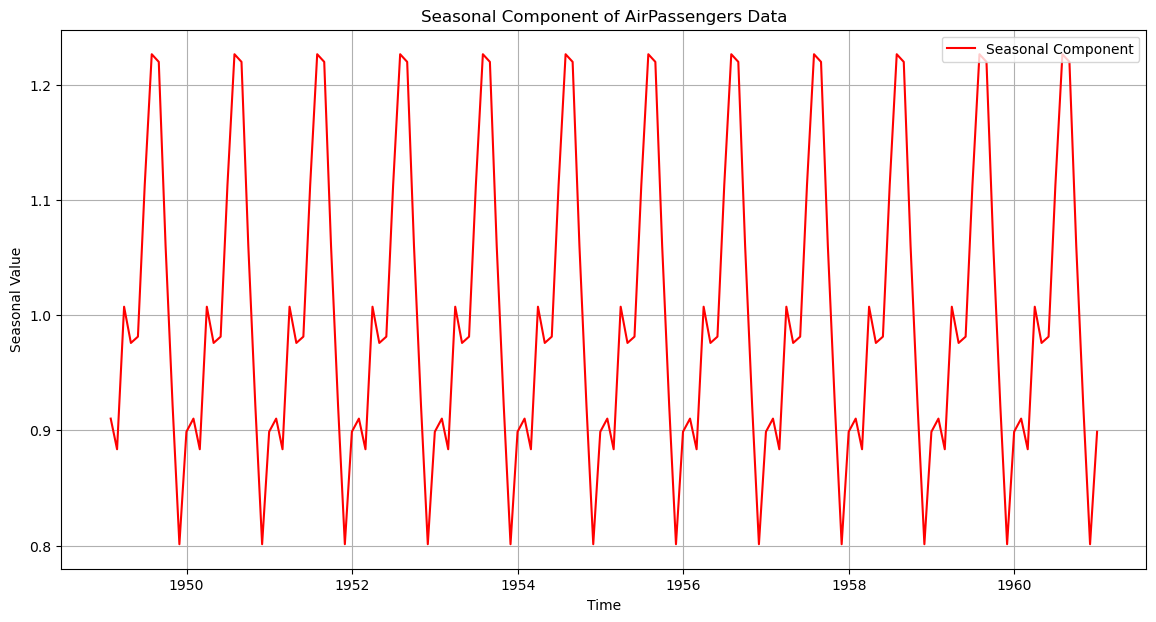

In [19]:
# --- Added the code here ---
decomposition=sm.tsa.seasonal_decompose(df['value'], model='multiplicative')
# ---------------------------

# Visualizing the seasonal component
plt.figure(figsize=(14,7))

# --- Added the code here ---
plt.plot(decomposition.seasonal, label='Seasonal Component', color='red')
# ---------------------------

plt.title('Seasonal Component of AirPassengers Data')
plt.xlabel('Time')
plt.ylabel('Seasonal Value')
plt.legend()
plt.grid(True)
plt.show()


#### Write down the explanations and interpretations:
- The seasonal component of the AirPassengers data shows regular fluctuations, with peaks and troughs occurring consistently over time, indicating a repeating yearly pattern.
- These seasonal variations are likely due to factors like holidays or tourism, which influence passenger numbers in a cyclical manner.
- The decomposition reveals that the seasonal pattern is multiplicative, meaning the fluctuations are proportional to the trend


#### Exercise 4 Time Series Analysis: Cyclic Patterns

#### Before starting the exercise, explain the definition of the Cyclic Patterns in your own words:
- Cyclic patterns in time series refer to long-term fluctuations that occur over irregular periods, often due to economic, business, or societal factors, and are not strictly tied to a fixed calendar or season.
- Unlike seasonality, which repeats at regular intervals, cyclic patterns are less predictable and can last for varying durations.


#### Problem Statement

Given the "AirPassengers" dataset, which represents the monthly totals of international airline passengers from 1949 to 1960, your task is to identify and visualize any cyclic patterns present in the data. By the end of this exercise, you should be able to understand how to detect cyclic patterns in time series data and their significance.


In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = sm.datasets.get_rdataset('AirPassengers').data
df.index = pd.date_range(start='1949-01-01', end='1961-01-01', freq='M')
df.head()


,time,value
1949-01-31,1949.000000,112
1949-02-28,1949.083333,118
1949-03-31,1949.166667,132
1949-04-30,1949.250000,129
1949-05-31,1949.333333,121


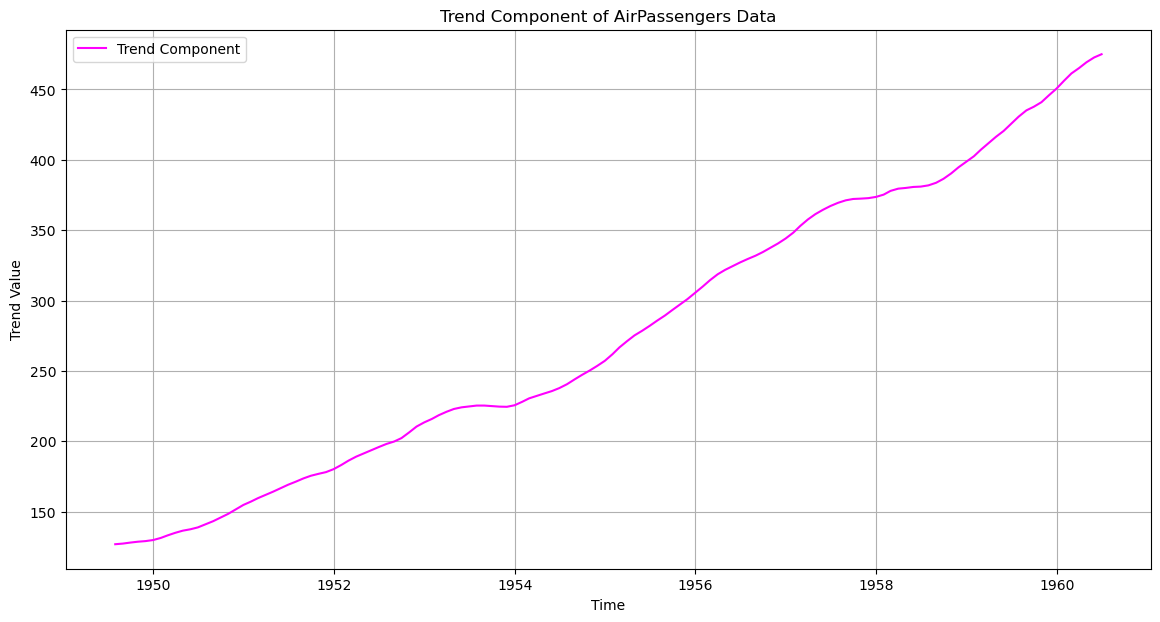

In [23]:
# --- Added the code here ---
decomposition=sm.tsa.seasonal_decompose(df['value'], model='multiplicative')
# ---------------------------

# Visualizing the trend component
plt.figure(figsize=(14,7))

# --- Added the code here ---
plt.plot(decomposition.trend, label='Trend Component', color='magenta')
# ---------------------------

plt.title('Trend Component of AirPassengers Data')
plt.xlabel('Time')
plt.ylabel('Trend Value')
plt.legend()
plt.grid(True)
plt.show()


#### Write down the explanations and interpretations:
- The trend component shows the overall direction of the data over time, indicating a steady increase in the number of passengers, reflecting growth in the airline industry.
- The plot demonstrates that, despite fluctuations, the number of passengers generally rises, pointing to a long-term upward trend in air travel.


#### Exercise 5 Time Series Analysis: Noise or Irregularity

#### Before starting the exercise, explain the definition of the Noise or Irregularity in your own words:
- Noise or irregularity in time series refers to random, unpredictable fluctuations in the data that don’t follow a clear pattern or trend. These can result from factors that are difficult to model, like sudden events or random errors.
- Unlike trends or seasonality, noise doesn’t repeat consistently or follow a discernible cycle, making it harder to forecast or explain, but it’s still present in most real-world data.


#### Problem Statement

Given the "AirPassengers" dataset, which represents the monthly totals of international airline passengers from 1949 to 1960, your task is to identify and visualize the noise or irregularity present in the data. By the end of this exercise, you should be able to understand how to detect noise in time series data and its implications.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = sm.datasets.get_rdataset('AirPassengers').data
df.index = pd.date_range(start='1949-01-01', end='1961-01-01', freq='M')
df.head()


,time,value
1949-01-31,1949.000000,112
1949-02-28,1949.083333,118
1949-03-31,1949.166667,132
1949-04-30,1949.250000,129
1949-05-31,1949.333333,121


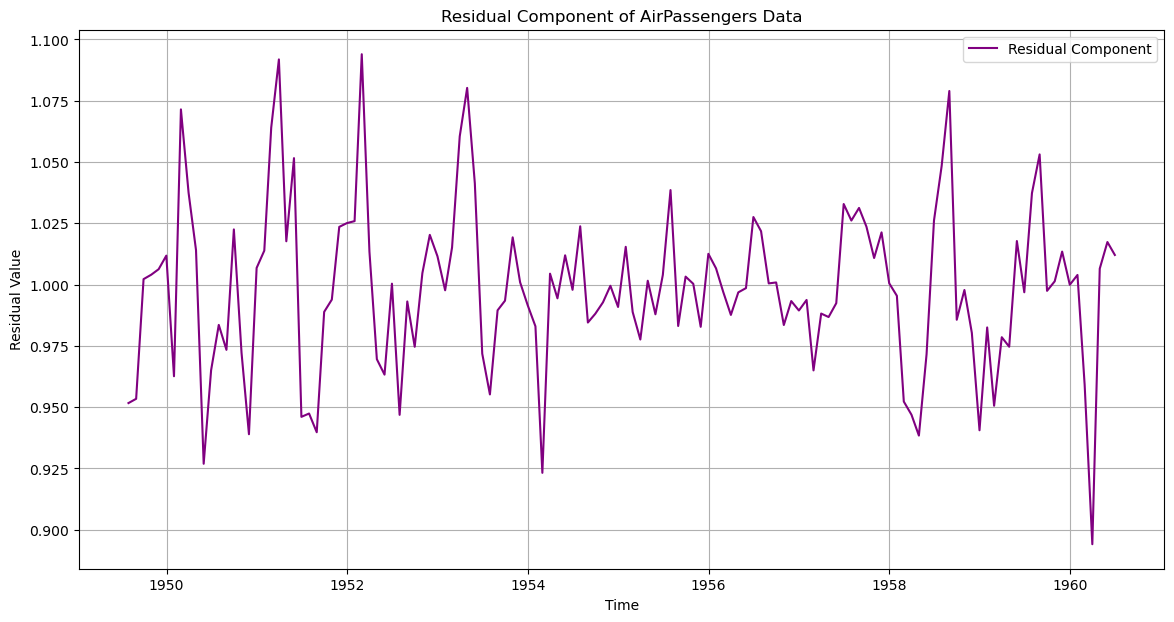

In [27]:
# --- Added the code here ---
decomposition=sm.tsa.seasonal_decompose(df['value'], model='multiplicative')
# ---------------------------

# Visualizing the residual component
plt.figure(figsize=(14,7))

# --- Added the code here ---
plt.plot(decomposition.resid, label='Residual Component', color='purple')
# ---------------------------

plt.title('Residual Component of AirPassengers Data')
plt.xlabel('Time')
plt.ylabel('Residual Value')
plt.legend()
plt.grid(True)
plt.show()


#### Write down the explanations and interpretations:
- The residual component shows the random fluctuations left after removing the trend and seasonal effects, representing the "noise" or irregularity in the data.
- The plot shows irregular ups and downs, which are not predictable and do not follow any specific pattern or trend, indicating random variations in the data.


#### Exercise 6 Time Series Analysis: Stationarity

#### Before starting the exercise, explain the definition of the Stationarity in your own words:
- Stationarity in time series means that the statistical properties, like the mean and variance, do not change over time. A stationary series has consistent behavior, with no trends, seasonal patterns, or sudden changes in variance.
- For a time series to be stationary, its data points should be evenly distributed around a constant mean and its fluctuations should have a constant variance, making it easier to model and forecast.


#### Problem Statement

Given the "CO2" dataset, which represents the atmospheric CO2 concentrations measured at the Mauna Loa Observatory in Hawaii from 1958 to 2001, your task is to determine if the time series data is stationary. You will also learn how to use statistical tests and visualizations to check for stationarity. By the end of this exercise, you should be able to understand the importance of stationarity in time series analysis and how to test for it.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

df = sm.datasets.co2.load_pandas().data
df.fillna(method='ffill', inplace=True)
df.head()


,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


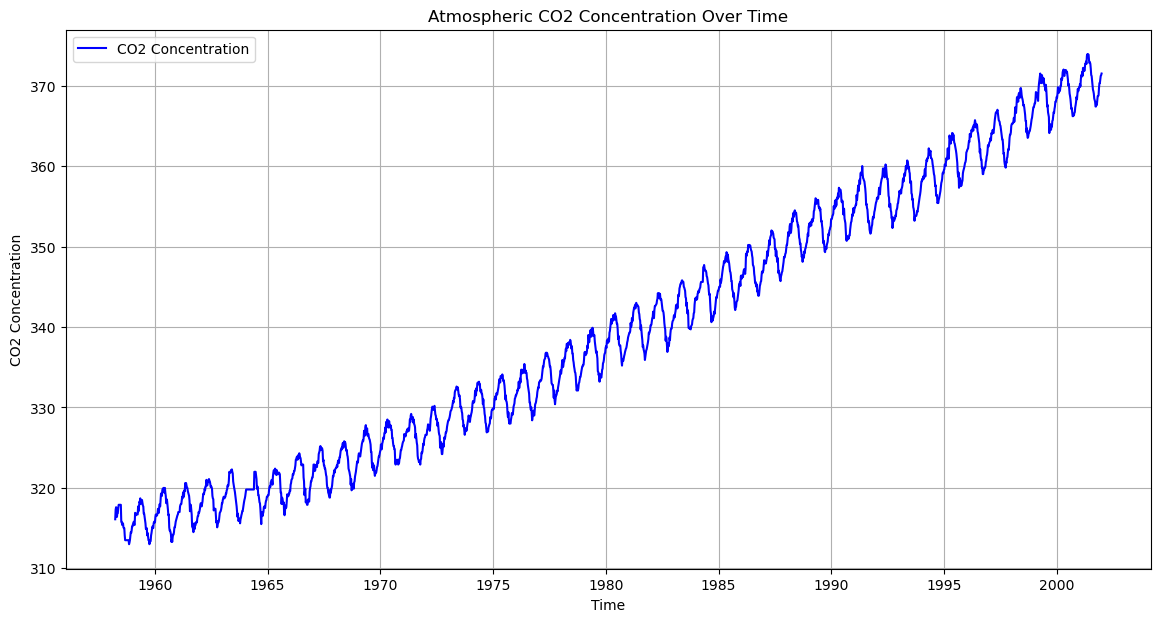

In [31]:
# Visualizing the time series data
plt.figure(figsize=(14,7))
plt.plot(df, label='CO2 Concentration', color='blue')
plt.title('Atmospheric CO2 Concentration Over Time')
plt.xlabel('Time')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# --- Added the code here ---
result = adfuller(df['co2'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
# ---------------------------

ADF Statistic: 0.04605110843812388
p-value: 0.9621787846784351
Critical Values: {'1%': -3.4332519309441296, '5%': -2.8628219967376647, '10%': -2.567452466810334}


#### Write down the explanations and interpretations:
- The ADF test shows the CO2 data is non-stationary, as the p-value (0.96) is high and the test statistic (0.046) is above the critical values.
- This means the data has a trend or changing behavior over time and isn’t stable enough for certain time series models.


#### Exercise 7 Understanding Lags

#### Before starting the exercise, explain the definition of the Lags in your own words:
- Lags refer to the time difference between an observation and its previous values in a time series. They help capture the relationship between past and future data points.
- In time series analysis, using lags means looking at how past values (lags) affect current values to identify patterns or trends that can be useful for forecasting.

#### Problem Statement

Given the "AirPassengers" dataset, your task is to visualize and understand the concept of lags in time series data. You will learn how to create lag plots and understand their significance. By the end of this exercise, you should have a clear understanding of lags and their importance in time series analysis.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', 
                 parse_dates=['Month'], index_col='Month')

df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


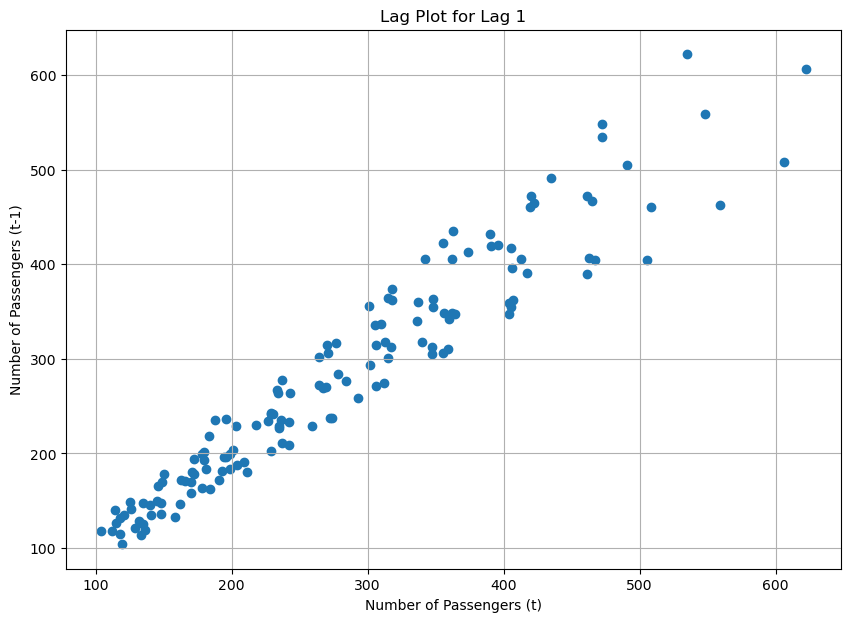

In [39]:
plt.figure(figsize=(10,7))

# --- Added the code here ---
lag_plot(df, lag=1)
# ---------------------------

plt.title('Lag Plot for Lag 1')
plt.xlabel('Number of Passengers (t)')
plt.ylabel('Number of Passengers (t-1)')
plt.grid(True)
plt.show()


#### Write down the explanations and interpretations:
- The plot reveals a strong positive correlation, as the points are closely grouped along a diagonal line. This suggests that the number of passengers in one month is closely related to the number of passengers in the previous month.
- The close alignment of the points indicates that past values (lag 1) are useful for predicting future values in this dataset, which is typical for time series with trends or patterns.

#### Exercise 8 Understanding Autocorrelation

#### Before starting the exercise, explain the definition of the Autocorrelation in your own words:
- Autocorrelation measures how a time series is correlated with a lagged version of itself, helping to identify repeating patterns or trends over time.
- It shows the relationship between observations at different time points, helping to see if past values influence future values, which is useful for forecasting and understanding the structure of the data.


#### Problem Statement

Given the "AirPassengers" dataset, your task is to:
1. Visualize the time series data.
2. Compute and visualize the autocorrelation of the dataset.

By the end of this exercise, you should have a clear understanding of how autocorrelation works and how to visualize it.


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
print(df.head())


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


<Figure size 1200x700 with 0 Axes>

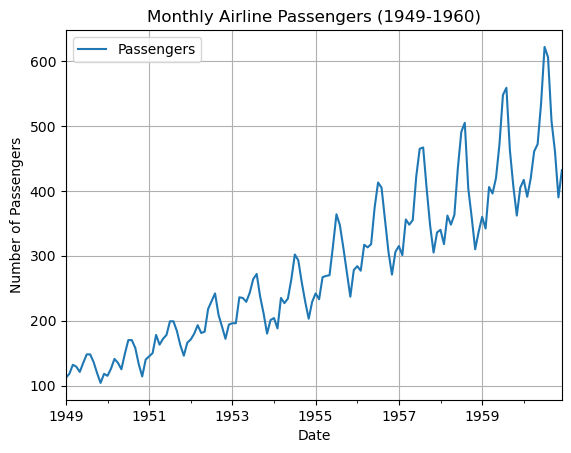

In [43]:
# Plotting the time series data
plt.figure(figsize=(12,7))
df.plot(title='Monthly Airline Passengers (1949-1960)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


<Figure size 1200x700 with 0 Axes>

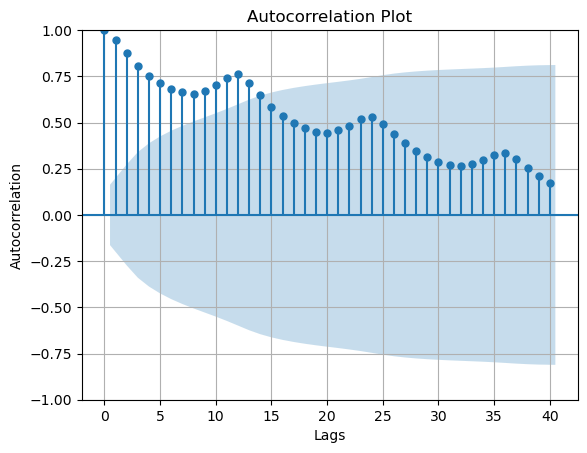

In [51]:
plt.figure(figsize=(12,7))

# --- Added the code here ---
plot_acf(df, lags=40)
# ---------------------------

plt.title('Autocorrelation Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


#### Write down the explanations and interpretations:
- The plot shows how the number of airline passengers at different time lags is correlated with each other. The x-axis represents the lag (time difference), and the y-axis shows the correlation values.
- We can see significant spikes at the initial lags (especially lag 1), indicating a strong correlation between passenger numbers at consecutive months. This suggests that past values strongly influence future values.
- The autocorrelation gradually decreases after the first few lags, which suggests that while the immediate past is highly correlated with the present, the influence weakens over time. This is typical in time series with a trend or seasonality.


#### Exercise 9 Moving Averages and Exponential Smoothing

#### Before starting the exercise, explain the definition of the Moving Averages and Exponential Smoothing in your own words:
- Moving Averages: This technique smooths out fluctuations in a time series by averaging data points over a specific window or period. It helps identify trends by reducing noise, making it easier to see patterns in the data.
- Exponential Smoothing: Unlike moving averages, exponential smoothing assigns more weight to recent data points and less to older ones. This makes it more responsive to changes and trends, making it useful for forecasting time series with patterns that change over time.


#### Problem Statement

Given the "Shampoo Sales" dataset, your task is to:
1. Visualize the time series data.
2. Apply and visualize the moving average technique.
3. Apply and visualize the exponential smoothing technique.

By the end of this exercise, you should have a clear understanding of how moving averages and exponential smoothing work and their impact on time series data.


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True, date_format='%Y-%m')
print(df.head())


       Sales
Month       
1-01   266.0
1-02   145.9
1-03   183.1
1-04   119.3
1-05   180.3


<Figure size 1200x700 with 0 Axes>

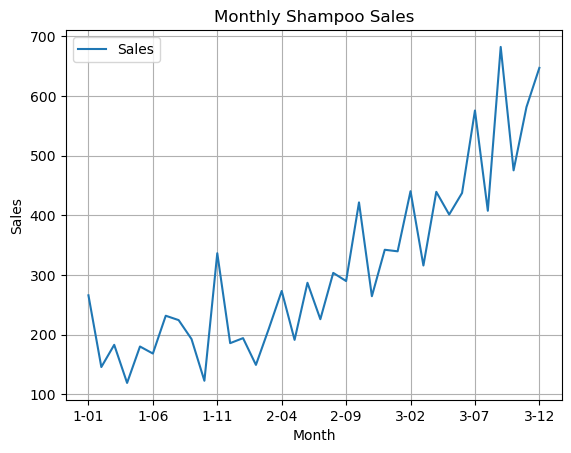

In [55]:
# Plotting the time series data
plt.figure(figsize=(12,7))
df.plot(title='Monthly Shampoo Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


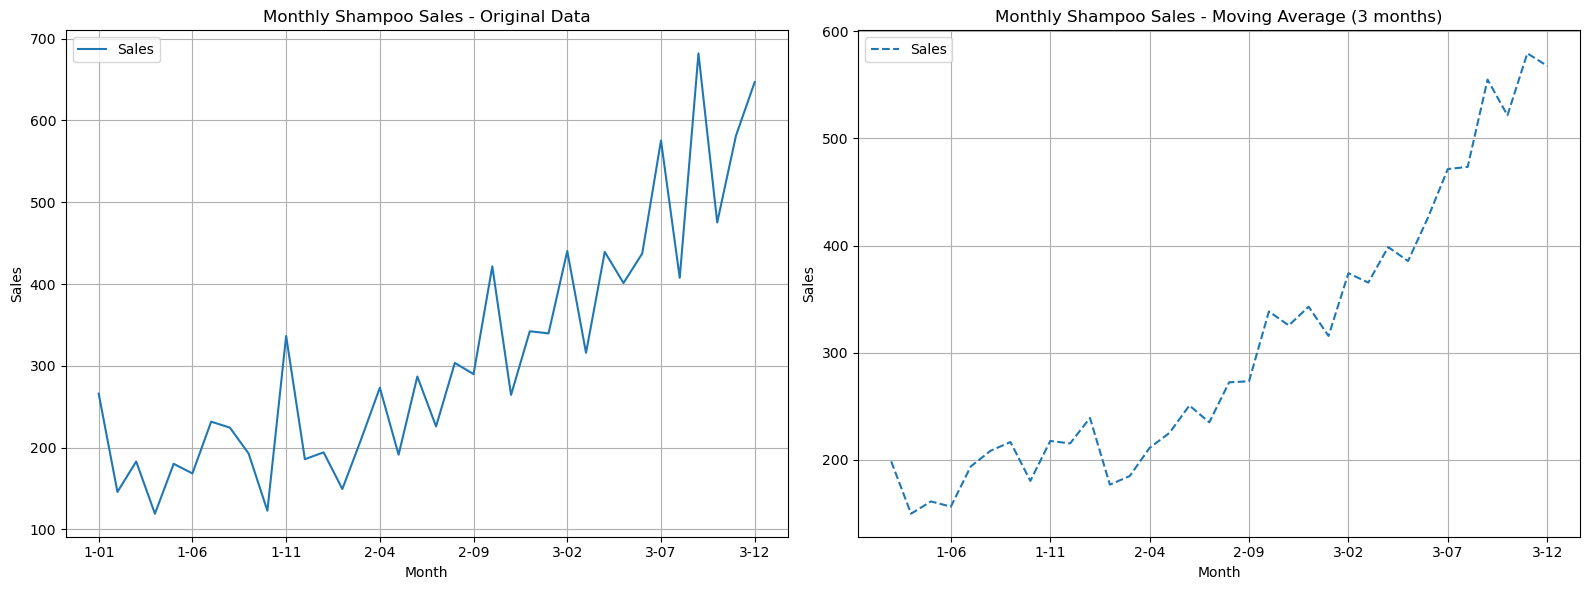

In [57]:
# --- Added the code here ---
moving_avg = df.rolling(window=3).mean()
# ---------------------------

# Plotting the original data and moving average in horizontal subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# First subplot: Original Data
df.plot(ax=axes[0], label='Original Data')
axes[0].set_title('Monthly Shampoo Sales - Original Data')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales')
axes[0].legend()
axes[0].grid(True)

# Second subplot: Moving Average
moving_avg.plot(ax=axes[1], label='Moving Average (3 months)', linestyle='--')
axes[1].set_title('Monthly Shampoo Sales - Moving Average (3 months)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Sales')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()



#### Write down the explanations and interpretations:
- Original Data Plot: The original data shows the monthly shampoo sales with fluctuations, indicating that sales vary over time. The pattern might include seasonality, trends, or other factors affecting sales.
- Moving Average Plot (3 months): The moving average smooths out the fluctuations by averaging sales over a 3-month period. The plot reveals the underlying trend more clearly, reducing short-term variations. It helps in observing the overall sales trend, highlighting peaks and dips in sales that may be harder to notice in the raw data.


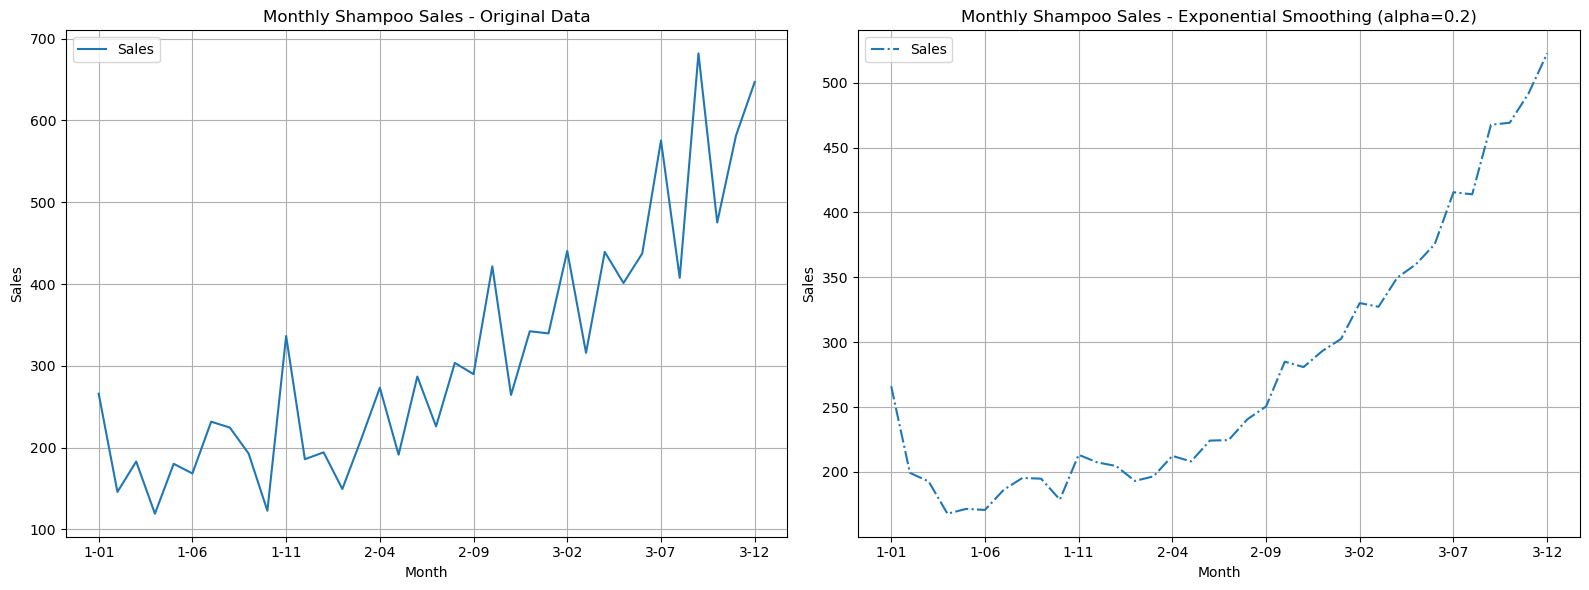

In [59]:
# --- Added the code here ---
alpha = 0.2
exp_smoothed = df.ewm(alpha=alpha).mean()
# ---------------------------

# Plotting the original data and exponential smoothed data in horizontal subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# First subplot: Original Data
df.plot(ax=axes[0], label='Original Data')
axes[0].set_title('Monthly Shampoo Sales - Original Data')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales')
axes[0].legend()
axes[0].grid(True)

# Second subplot: Exponential Smoothing
exp_smoothed.plot(ax=axes[1], label=f'Exponential Smoothing (alpha={alpha})', linestyle='-.')
axes[1].set_title(f'Monthly Shampoo Sales - Exponential Smoothing (alpha={alpha})')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Sales')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


#### Write down the explanations and interpretations:
- Original Data Plot: This plot shows the monthly shampoo sales with noticeable fluctuations. These variations can reflect seasonality, promotions, or other external factors impacting sales each month.
- Exponential Smoothing Plot (alpha=0.2): The exponential smoothing curve applies more weight to recent data points, smoothing out the noise and highlighting the underlying sales trend. The plot shows that the smoothed line reacts more quickly to recent changes compared to the moving average, offering a more responsive view of the sales trend.


#### Exercise 10 ARIMA

#### Before starting the exercise, explain the definition of the ARIMA in your own words:
- ARIMA is a model used to predict future values in a time series by analyzing past data. It looks at past values, trends, and errors to make predictions.
- It helps in forecasting by handling patterns, trends, and correlations in the data, ensuring the model adapts to different behaviors over time.


#### Problem Statement

Given the "Airline Passengers" dataset, your task is to:
1. Visualize the time series data.
2. Decompose the time series into its trend, seasonal, and residual components.
3. Determine the ARIMA parameters (p, d, q).
4. Fit an ARIMA model and forecast future values.
5. Visualize the original data, the ARIMA fit, and the forecast.

By the end of this exercise, you should have a clear understanding of how ARIMA works and its application in time series forecasting.


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Figure size 1200x700 with 0 Axes>

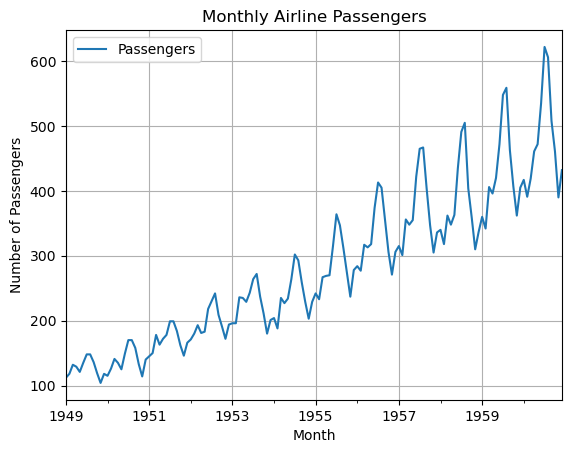

In [63]:
# Plotting the time series data
plt.figure(figsize=(12,7))
df.plot(title='Monthly Airline Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


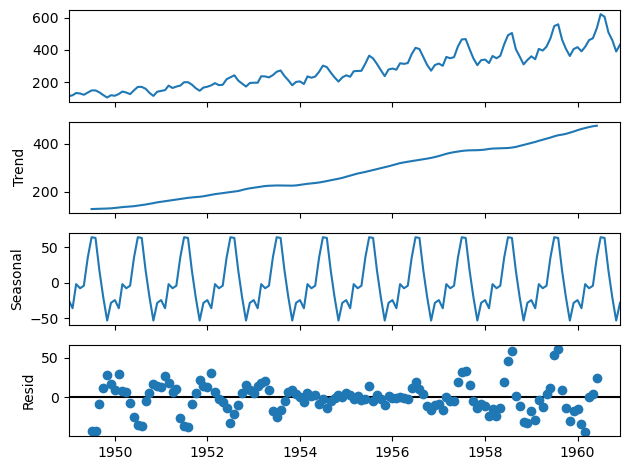

In [67]:
# --- Added the code here ---
decomposition=seasonal_decompose(df)
# ---------------------------

# Plotting the decomposed components
decomposition.plot()
plt.show()


<Figure size 1200x700 with 0 Axes>

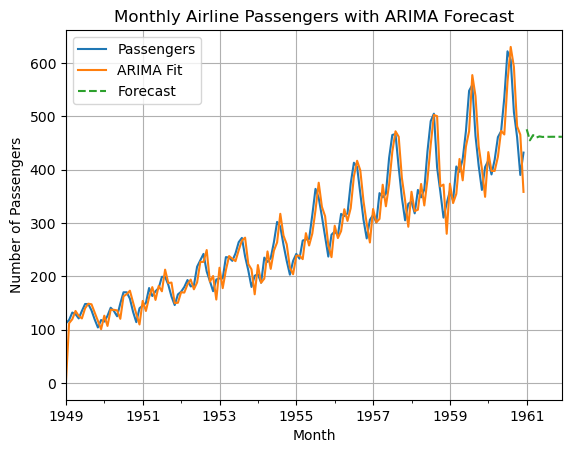

In [69]:
import warnings
warnings.filterwarnings("ignore")

# --- Added the code here ---
p, d, q = 1,1,1
model = ARIMA(df, order=(p,d,q))
results = model.fit()
forecast = results.forecast(steps=12)
# ---------------------------

# Plotting the original data, ARIMA fit, and forecast
plt.figure(figsize=(12,7))
df.plot(label='Original Data')

# --- Added the code here ---
results.fittedvalues.plot(label='ARIMA Fit')
forecast.plot(label='Forecast', linestyle='--')
# ---------------------------

plt.title('Monthly Airline Passengers with ARIMA Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


#### Write down the explanations and interpretations:
- Decomposition Plot: The decomposition shows how the original time series data is split into three components: trend, seasonality, and residuals. The trend indicates the overall direction (upward or downward), seasonality shows the regular patterns repeating over time, and residuals are the random variations left after removing the trend and seasonality.
- ARIMA Model: The ARIMA model (1, 1, 1) was used to fit the time series data. The plot shows the original data along with the ARIMA fit (the predicted values from the model). The forecasted values, shown as a dashed line, predict future values (the next 12 months). The forecast indicates the expected trend of the data, considering past trends and fluctuations.


#### Exercise 11 Seasonal Decomposition

#### Before starting the exercise, explain the definition of the Seasonal Decomposition in your own words:
- Seasonal decomposition breaks a time series into trend, seasonality, and residuals to identify underlying patterns.
- It helps in understanding regular cycles, long-term trends, and random variations for better forecasting and analysis.


#### Problem Statement

Given the "CO2 levels" dataset, your task is to:
1. Visualize the time series data.
2. Decompose the time series into its trend, seasonal, and residual components.
3. Analyze and interpret the decomposed components.

By the end of this exercise, you should have a clear understanding of seasonal decomposition and its application in time series analysis.


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

url = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv'
df = pd.read_csv(url, skiprows=56, header=None)
df.columns = ['Year', 'Month', 'Decimal Date', 'CO2', 'Interpolated', 'Trend', 'Number of Days', 'Uncertainty']
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df.set_index('Date', inplace=True)
df.head()


,Year,Month,Decimal Date,CO2,Interpolated,Trend,Number of Days,Uncertainty
Date,,,,,,,,
1959-06-01,1959,6,1959.4548,318.15,316.00,-1,-9.99,-0.99
1959-07-01,1959,7,1959.5370,316.54,315.87,-1,-9.99,-0.99
1959-08-01,1959,8,1959.6219,314.80,316.09,-1,-9.99,-0.99
1959-09-01,1959,9,1959.7068,313.84,316.75,-1,-9.99,-0.99
1959-10-01,1959,10,1959.7890,313.33,316.34,-1,-9.99,-0.99


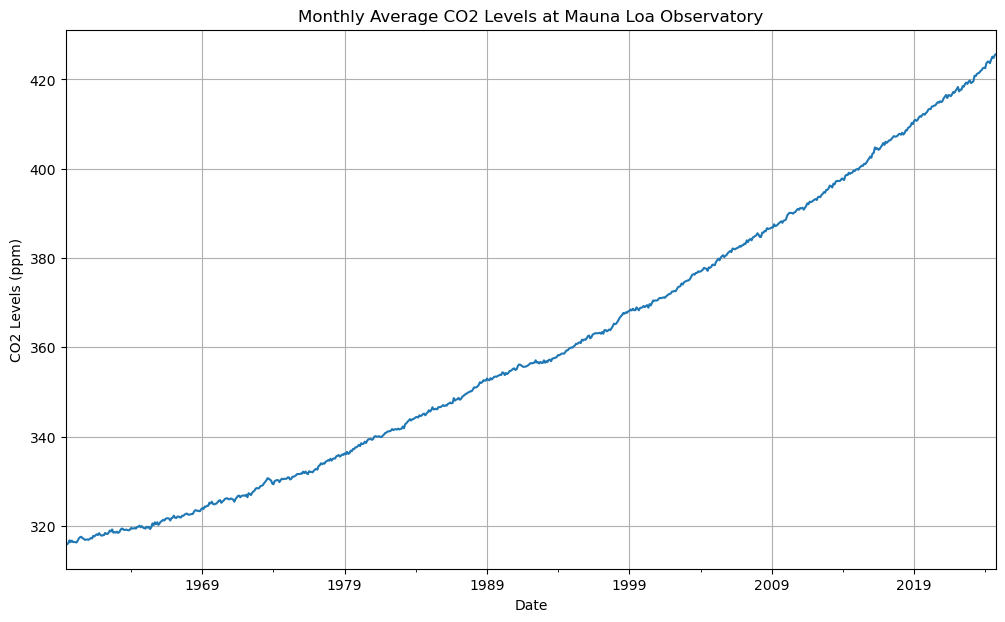

In [73]:
# Plotting the time series data
plt.figure(figsize=(12,7))
df['Interpolated'].plot(title='Monthly Average CO2 Levels at Mauna Loa Observatory')
plt.xlabel('Date')
plt.ylabel('CO2 Levels (ppm)')
plt.grid(True)
plt.show()


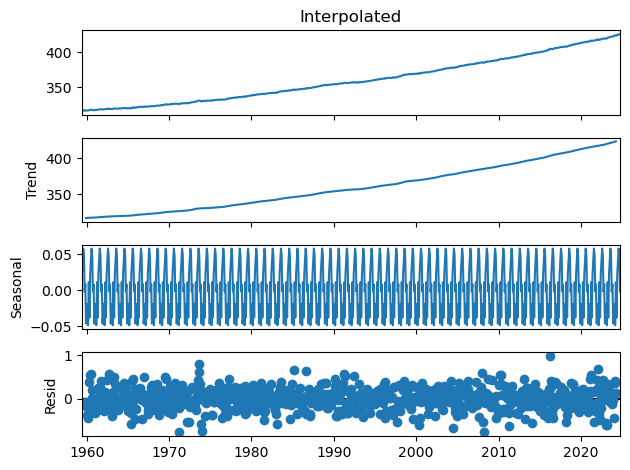

In [75]:
# --- Added the code here ---
decomposition=seasonal_decompose(df['Interpolated'], model='additive')
# ---------------------------

# Plotting the decomposed components
decomposition.plot()
plt.show()


#### Write down the explanations and interpretations:
- The decomposition of the CO2 data shows how the CO2 levels at Mauna Loa vary over time due to trend, seasonality, and residuals.
- The trend component illustrates the long-term upward movement, seasonality shows periodic fluctuations, and the residual component represents random variations or noise in the data.


#### Exercise 12 Time Series Forecasting using Neural Networks

#### Before starting the exercise, explain the definition of the Neural Networks in your own words:
- Neural networks are computer systems inspired by the human brain that can learn patterns from data and make predictions or decisions based on them.
- They consist of layers of connected "neurons" that process information, adjust their connections during learning, and solve problems like classification, forecasting, or recognizing patterns.


#### Problem Statement
You are given a dataset containing the historical closing prices of Apple Stock. Your task is to build a neural network model to predict future stock prices based on past data.

In [77]:
import pandas as pd

url = 'https://raw.githubusercontent.com/matplotlib/sample_data/master/aapl.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
df.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


In [79]:
df.isnull().sum()


Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [81]:
# --- Added the code here ---
def create_features(data, n):
    for i in range(1, n+1):
        data[f'lag_{i}'] = data['Close'].shift(i)
    data = data.dropna()
    return data

n = 5
# ---------------------------

df = create_features(df, n)
X = df.drop('Close', axis=1).values
y = df['Close'].values


In [83]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# --- Added the code here ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# ---------------------------

In [85]:
# --- Added the code here ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# ---------------------------

In [87]:
# --- Added the code here ---
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
# ---------------------------

In [89]:
# --- Added the code here ---
model.fit(X_train, y_train)
# ---------------------------

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [91]:
# --- Added the code here ---
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# ---------------------------

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.28682986700229945


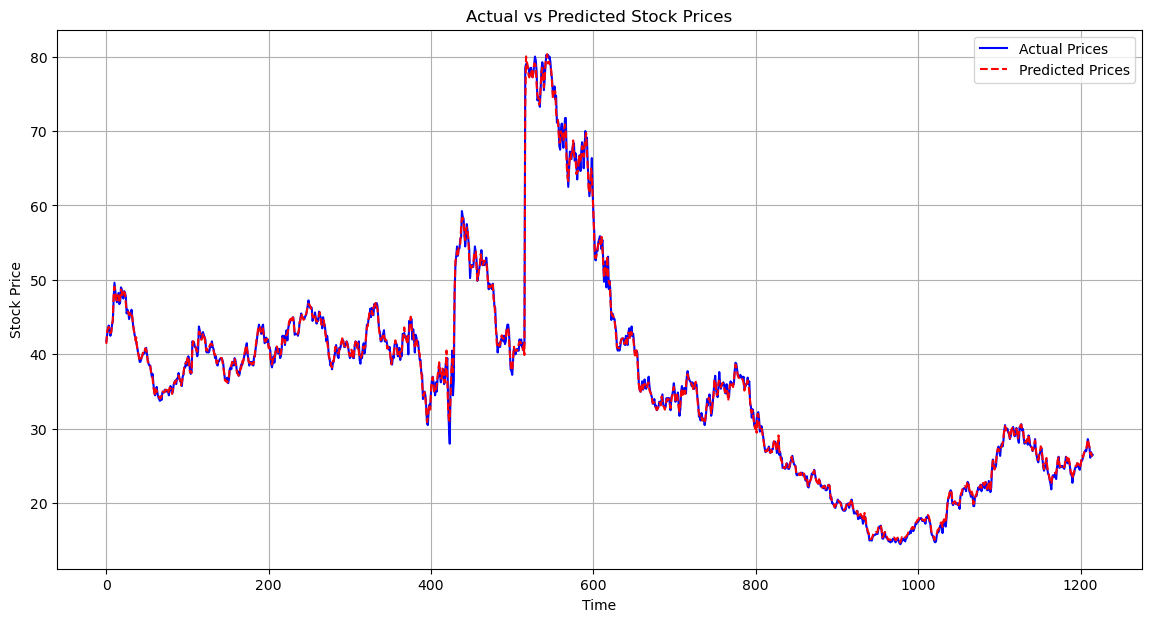

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# --- Added the code here ---
plt.plot(y_test, label="Actual Prices", color='blue')
plt.plot(y_pred, label="Predicted Prices", color='red', linestyle='dashed')
# ---------------------------

plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


#### Write down the explanations and interpretations:
- Model Overview: A neural network (MLPRegressor) was used to predict Apple stock prices. The model was trained using lag features (past stock prices) and tested on the most recent data.
- Performance: The mean squared error (MSE) value of 0.2868 indicates the model's prediction accuracy. A lower MSE signifies that the model's predicted values are closer to the actual stock prices, but there's still room for improvement. The actual vs. predicted plot visually demonstrates the model’s performance over time, with red dashed lines representing the predicted values and blue lines showing the actual prices.

#### Exercise 13 Predicting Financial Time Series Data: A Case Study on Apple Inc.

#### Problem Statement

Given Apple Inc.'s stock price data, your task is to:
1. Explore and preprocess the time series data.
2. Build a forecasting model.
3. Predict future stock prices and compare them with actual values.
4. Visualize and interpret the results.

By the end of this exercise, you should have a clear understanding of how to approach financial time series forecasting and the challenges involved.


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 

url = 'https://raw.githubusercontent.com/matplotlib/sample_data/master/aapl.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
df.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


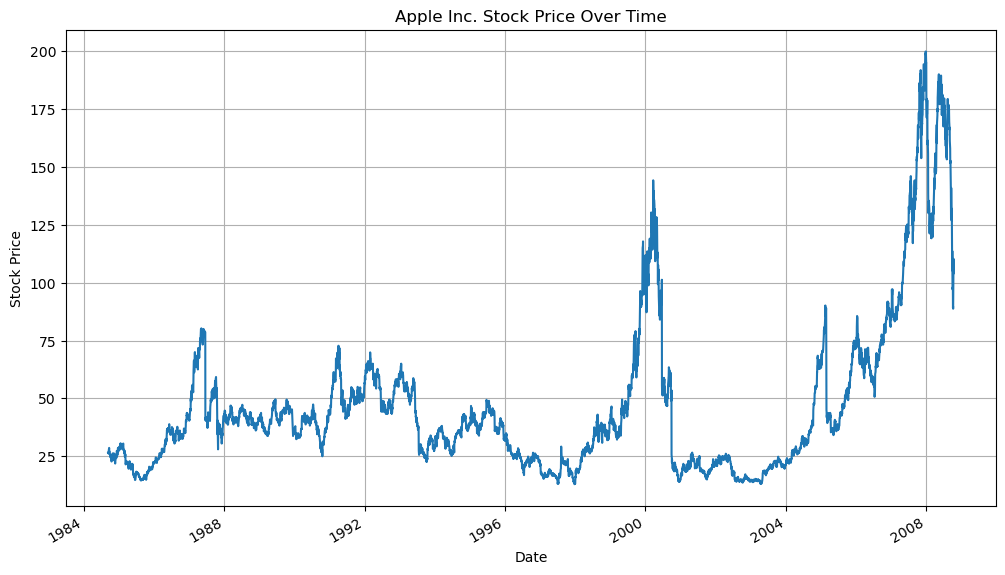

In [99]:
# Plotting the stock price data
plt.figure(figsize=(12,7))
df['Close'].plot(title='Apple Inc. Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


In [101]:
# --- Added the code here ---
look_back = 5
for i in range(1, look_back + 1):
    df[f'lag_{i}'] = df['Close'].shift(i)
# ---------------------------

# Dropping NaN values
df = df.dropna()

# --- Added the code here ---
train_size = int(len(df)*0.8)
train, test = df[:train_size], df[train_size:]
# ---------------------------

X_train = train.drop('Close', axis=1)
y_train = train['Close']
X_test = test.drop('Close', axis=1)
y_test = test['Close']


In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# --- Added the code here ---
lr = LinearRegression()
# ---------------------------

lr.fit(X_train, y_train)

# Predicting on the test set
lr_preds = lr.predict(X_test)

# Calculating the RMSE
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_rmse


0.4167414542622079

In [105]:
from sklearn.tree import DecisionTreeRegressor

# --- Added the code here ---
dt = DecisionTreeRegressor()
# ---------------------------

dt.fit(X_train, y_train)

# Predicting on the test set
dt_preds = dt.predict(X_test)

# Calculating the RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_preds))
dt_rmse


0.8901548043222004

In [107]:
from sklearn.ensemble import RandomForestRegressor

# --- Added the code here ---
rf = RandomForestRegressor(n_estimators=100)
# ---------------------------

rf.fit(X_train, y_train)

# Predicting on the test set
rf_preds = rf.predict(X_test)

# Calculating the RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_rmse


0.5582609144642106

In [109]:
# --- Added the code here ---
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'RMSE': [lr_rmse, dt_rmse, rf_rmse]
})
# ---------------------------

model_comparison.sort_values('RMSE', ascending=True)


,Model,RMSE
0,Linear Regression,0.416741
2,Random Forest,0.558261
1,Decision Tree,0.890155


#### Write down the explanations and interpretations:
- Model Comparison: The RMSE (Root Mean Squared Error) values for different models were calculated to compare their performance on the Apple stock price prediction task.
  - Linear Regression: The linear regression model performed the best with the lowest RMSE of 0.4167, indicating it made the most accurate predictions.
  - Random Forest: The random forest model had a higher RMSE of 0.5583, which shows its predictions were less accurate compared to linear regression    but still better than decision tree predictions.
  - Decision Tree: The decision tree model had the highest RMSE of 0.8902, indicating that its predictions were the least accurate among the three models.
- Interpretation: The linear regression model proved to be the most efficient for this task, likely because stock prices exhibit some degree of linearity in the short-term trend. Random forests, while more flexible, may not perform better without further tuning or feature engineering. The decision tree's relatively high error indicates overfitting or poor generalization on this data.








---

#### Revised Date: August 15, 2024